In [81]:
import zlib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [98]:
depth_path = '/Users/ribikbulatov/Desktop/Depth'

# Depth data parameters
w = 320
h = 240

In [99]:
with open(depth_path, 'rb') as f:
    data = zlib.decompress(f.read(), -15)

In [100]:
FRAME_COUNT = int(len(data) / w / h / 2)
FRAME_COUNT

250

In [101]:
frames = np.frombuffer(data, np.float16).reshape(FRAME_COUNT,h,w).copy()

In [102]:
frames = np.nan_to_num(frames, 0)

In [103]:
maxim = frames.max()
print(maxim)
imgs = (frames / maxim * 255.0).astype('uint8')

5.777


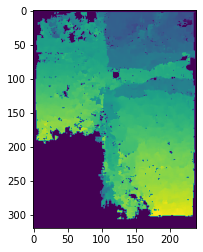

In [104]:
plt.imshow(np.flip(imgs[0,:,:].T, axis=1))

In [105]:
FPS = 25 # TODO: figure out the correct fps
fourcc = cv2.VideoWriter_fourcc(*'mpeg')
out = cv2.VideoWriter('/Users/ribikbulatov/Desktop/depth_video.avi',fourcc, FPS, (h,w))

for i in range(FRAME_COUNT):
    out.write(cv2.cvtColor(np.flip(imgs[i,:,:].T, axis=1), cv2.COLOR_GRAY2BGR))

out.release()

In [95]:
!ls

Applications
CLionProjects
Desktop
Documents
Downloads
Image_Quality_Assesment
Library
Mesh Reconstruction
Movies
Music
NIQE
Pictures
Projects
Public
Untitled Folder
Untitled Folder 1
Untitled Folder 2
Untitled.ipynb
colmap
for_git
for_git_1
image_preprocessing
merlin_image_processing
merlin_image_processing-master@c4d5a009894
notebooks-master
opt
panorama_quality_essesment
stitching_assessment
stitching_core
test.jpg
test1.jpg
test_1.jpg
test_2.jpg
дляТестированияОценщика.jpg
плохая.jpg
плохая_1.jpg
тест_3.jpg
